In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from scipy.stats import norm
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set()

In [2]:
#Loading the dataset
iris = sns.load_dataset("iris")

feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Separating the features
x = iris.loc[:, feature].values

# Separating the target
y = iris.loc[:,['species']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)

pC = pca.fit_transform(x)

principalDf = pd.DataFrame(data = pC, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)

Text(0.5, 1.0, 'PCA with 2 components')

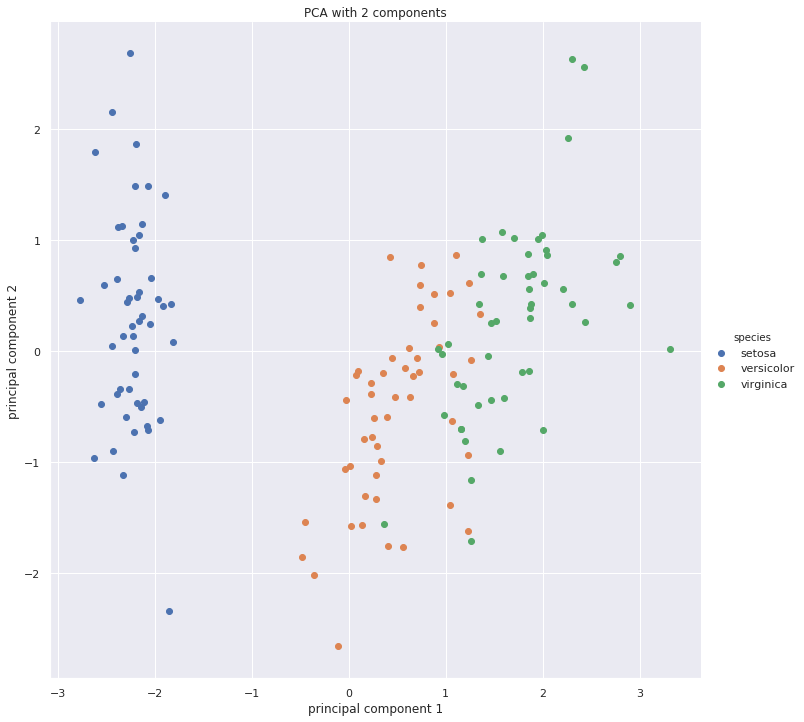

In [3]:
#plotting the iris data using PCA
s = sns.FacetGrid(finalDf, hue ="species", height=10)
s = (s.map(plt.scatter,"principal component 1", "principal component 2").add_legend())
plt.title('PCA with 2 components')

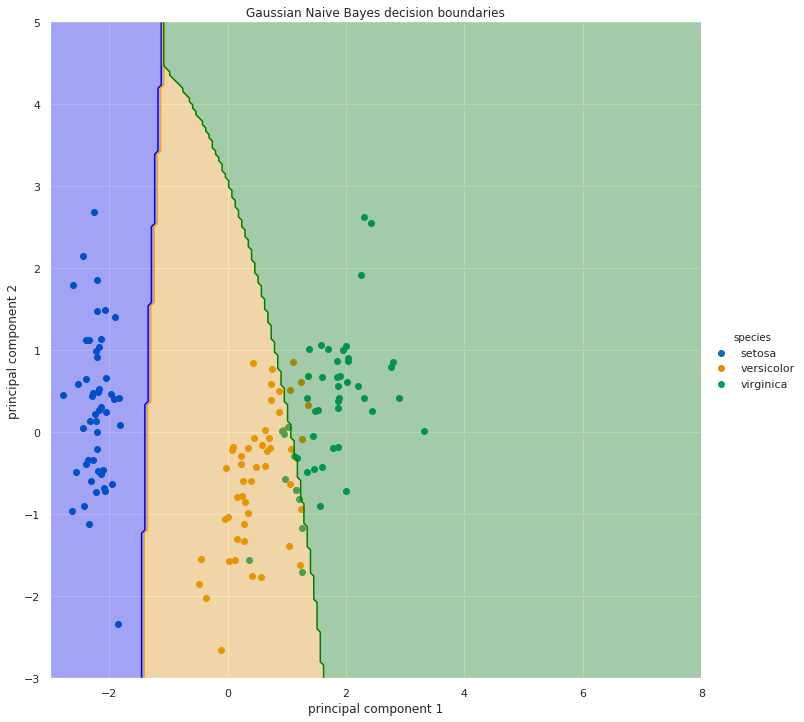

In [4]:
def predict_NB_gaussian (X,mu_list,std_list,pi_list):
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )  
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) 
                * pi_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

#calculating mean, standard deviation and probablity

mu = np.split(finalDf.groupby('species').mean().values,[1,2])
std = np.split(finalDf.groupby('species').std().values,[1,2], axis = 0)
pi = finalDf.iloc[:,2].value_counts().values / len(finalDf)

N = 200
X = np.linspace(-3, 8, N)
Y = np.linspace(-3, 5, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(finalDf, hue="species", height=10, palette = 'colorblind') .map(plt.scatter, "principal component 1", "principal component 2",)  .add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array(  [predict_NB_gaussian( np.array([xx,yy]).reshape(-1,1), mu, std, pi) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = 0.3, colors = ('blue','orange','green'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','orange','green'))

# Addd axis and title
my_ax.set_xlabel('principal component 1')
my_ax.set_ylabel('principal component 2')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()


In [5]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list): 
    #Returns the class for which the Gaussian Naive Bayes objective function has greatest value
    scores_list = []
    classes = len(mu_list)
    
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )  
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] )
                * norm.pdf(x = X[2], loc = mu_list[p][0][2], scale = std_list[p][0][2] )
                * norm.pdf(x = X[3], loc = mu_list[p][0][3], scale = std_list[p][0][3] ) 
                * pi_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

In [6]:
#calculating the parameters for Guassian Distribution
mu_list = np.split(iris.groupby('species').mean().values,[1,2])
std_list = np.split(iris.groupby('species').std().values,[1,2])
pi_list = iris.iloc[:,4].value_counts().values / len(iris)

X_data = iris.iloc[:,0:4]
y_labels = iris.iloc[:,4].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

y_pred = np.array(  [predict_NB_gaussian_class( np.array([xx,yy,zz,nn]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy,zz,nn in zip(np.ravel(X_data.values[:,0]), np.ravel(X_data.values[:,1]),np.ravel(X_data.values[:,2]),np.ravel(X_data.values[:,3])) ] )
#calculating the accuracy using all four features
#accuracy of 0.96 
display(np.mean(y_pred == y_labels))

0.96